# Superstore Sales Analysis: A Data Engineering Perspective

## Objective
This project analyzes sales data from a Superstore dataset to:
1. Understand the impact of discounts on profits.
2. Identify transaction patterns using clustering.
3. Provide actionable insights to optimize pricing strategies.

### Methodology
1. **Exploratory Data Analysis (EDA)**:
   - Analyzed key features, distributions, and correlations.
2. **Outlier Analysis**:
   - Detected outliers using visual and IQR methods, assessing their impact on correlations.
3. **Discount Analysis**:
   - Examined the relationship between discounts and profit by category and region.
4. **Clustering**:
   - Applied KMeans to segment transactions based on sales, profit, discounts, and quantity.


In [144]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("archive/Sample - Superstore.csv", encoding='Windows-1252')

# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [123]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop duplicates
df = df.drop_duplicates()

# Evaluate the correct date conversion
df.head()

Missing values:


 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Exploratory Data Analysis (EDA)

### Dataset Overview
The dataset contains the following key variables:
- **Sales**: Total transaction value.
- **Profit**: Net profit for each transaction.
- **Discount**: Applied discount percentage.
- **Quantity**: Number of items sold in each transaction.

              Sales       Profit     Discount     Quantity
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     0.156203     3.789574
std      623.245101   234.260108     0.206452     2.225110
min        0.444000 -6599.978000     0.000000     1.000000
25%       17.280000     1.728750     0.000000     2.000000
50%       54.490000     8.666500     0.200000     3.000000
75%      209.940000    29.364000     0.200000     5.000000
max    22638.480000  8399.976000     0.800000    14.000000


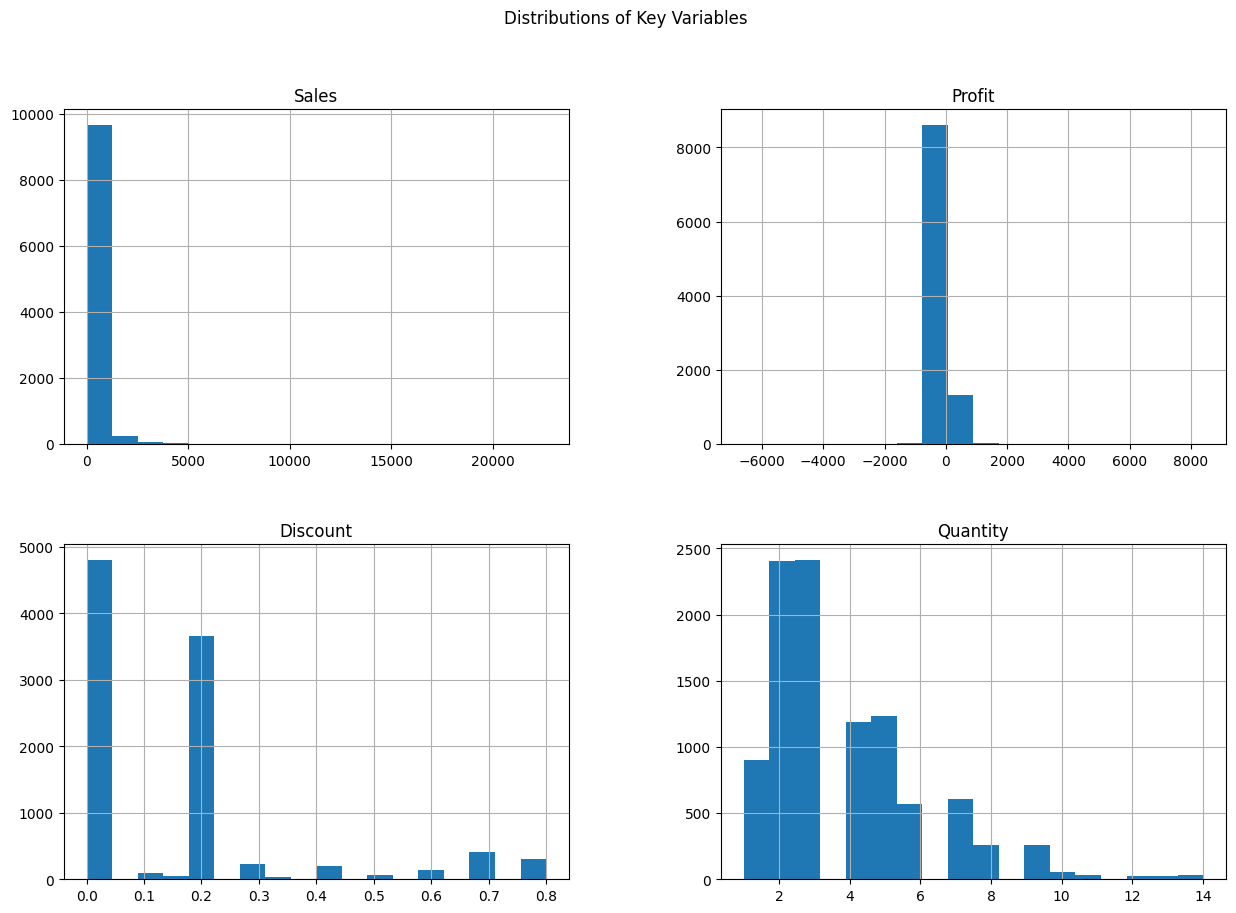

In [124]:
# Summary statistics
print(df[['Sales', 'Profit', 'Discount', 'Quantity']].describe())

# Histograms
df[['Sales', 'Profit', 'Discount', 'Quantity']].hist(bins=18, figsize=(15, 10))
plt.suptitle("Distributions of Key Variables")
plt.show()

#### Summary Statistics
| Metric       | Sales       | Profit      | Discount    | Quantity    |
|--------------|-------------|-------------|-------------|-------------|
| Count        | 9,994       | 9,994       | 9,994       | 9,994       |
| Mean         | 229.86      | 28.66       | 0.156       | 3.79        |
| Std Dev      | 623.25      | 234.26      | 0.206       | 2.22        |
| Min          | 0.44        | -6,599.98   | 0.0         | 1.0         |
| 25% (Q1)     | 17.28       | 1.73        | 0.0         | 2.0         |
| Median (Q2)  | 54.49       | 8.67        | 0.2         | 3.0         |
| 75% (Q3)     | 209.94      | 29.36       | 0.2         | 5.0         |
| Max          | 22,638.48   | 8,399.98    | 0.8         | 14.0        |

- **Sales:** Most transactions are small, with a few extreme high values, suggesting potential bulk orders.
- **Profit:** There are significant losses in some transactions, which need further investigation.
- **Discount:** Discounts are concentrated at 0% and 20%, with rare high discounts (>50%).
- **Quantity:** Most transactions involve small order sizes (1–5 items).


#### Heatmap Visualization
The heatmap below highlights the strongest correlations (`Sales vs Profit`) and the weakest (`Discount vs Sales`).

- **Next Steps**: Focus on exploring the relationship between `Sales` and `Profit`, as it has the highest correlation among all pairs.


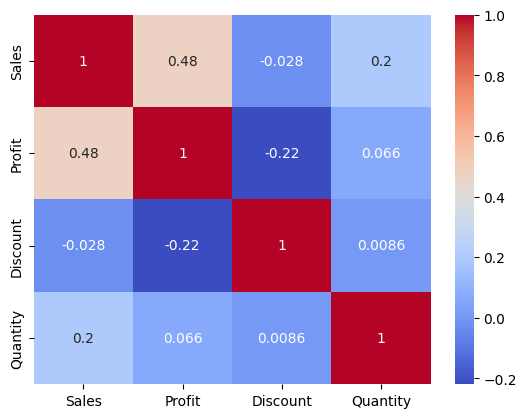

In [125]:
correlation_matrix = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Correlation Analysis

#### Summary of Relationships:
1. **Sales vs Profit**:
   - Correlation: **0.48 (moderate positive)**.
   - Indicates a general trend: higher sales often lead to higher profits, but other factors like discounts or product margins impact this relationship.

2. **Discount vs Profit**:
   - Correlation: **-0.22 (weak negative)**.
   - Discounts tend to reduce profits, but the effect is not overly strong. This suggests other dynamics, like strategic promotions or customer behaviors, may counterbalance the discounts.

3. **Discount vs Sales**:
   - Correlation: **-0.028 (no significant relationship)**.
   - Discounts do not strongly drive higher sales, indicating room for pricing strategy optimization.

4. **Quantity vs Profit**:
   - Correlation: **0.066 (very weak positive)**.
   - The number of items sold does not significantly influence profits, likely due to differences in product pricing and margins.


## Outlier Exploration and Relationships

#### Box Plot Analysis
1. **Sales**:
   - Extreme points (>15,000) represent unusually large transactions, likely bulk orders or large client deals.
   - Majority of sales are clustered under 5,000, suggesting smaller or average transactions dominate.

2. **Profit**:
   - Extreme negative outliers (e.g., < -4,000) are visible, often tied to high discounts.
   - Profits for most transactions remain positive and close to the median.

#### Scatter Plot Analysis
1. **Blue Points (Low Discounts)**:
   - Most low-discount transactions fall in the positive profit range, confirming their profitability.

2. **Red and Orange Points (High Discounts)**:
   - Concentrated in the negative profit range, showing that high discounts reduce margins significantly.
   - Discounts above 0.75 frequently lead to losses.

3. **Key Outliers**:
   - Positive outliers: Transactions with sales > 15,000 and moderate profits.
   - Negative outliers: Transactions with profit < -4,000, often involving moderate sales and high discounts.

#### Visualizations:

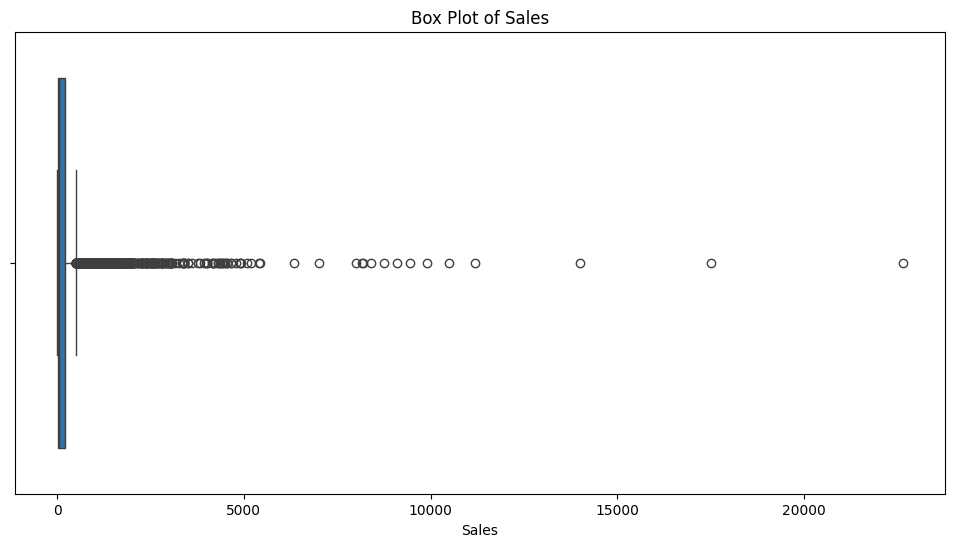

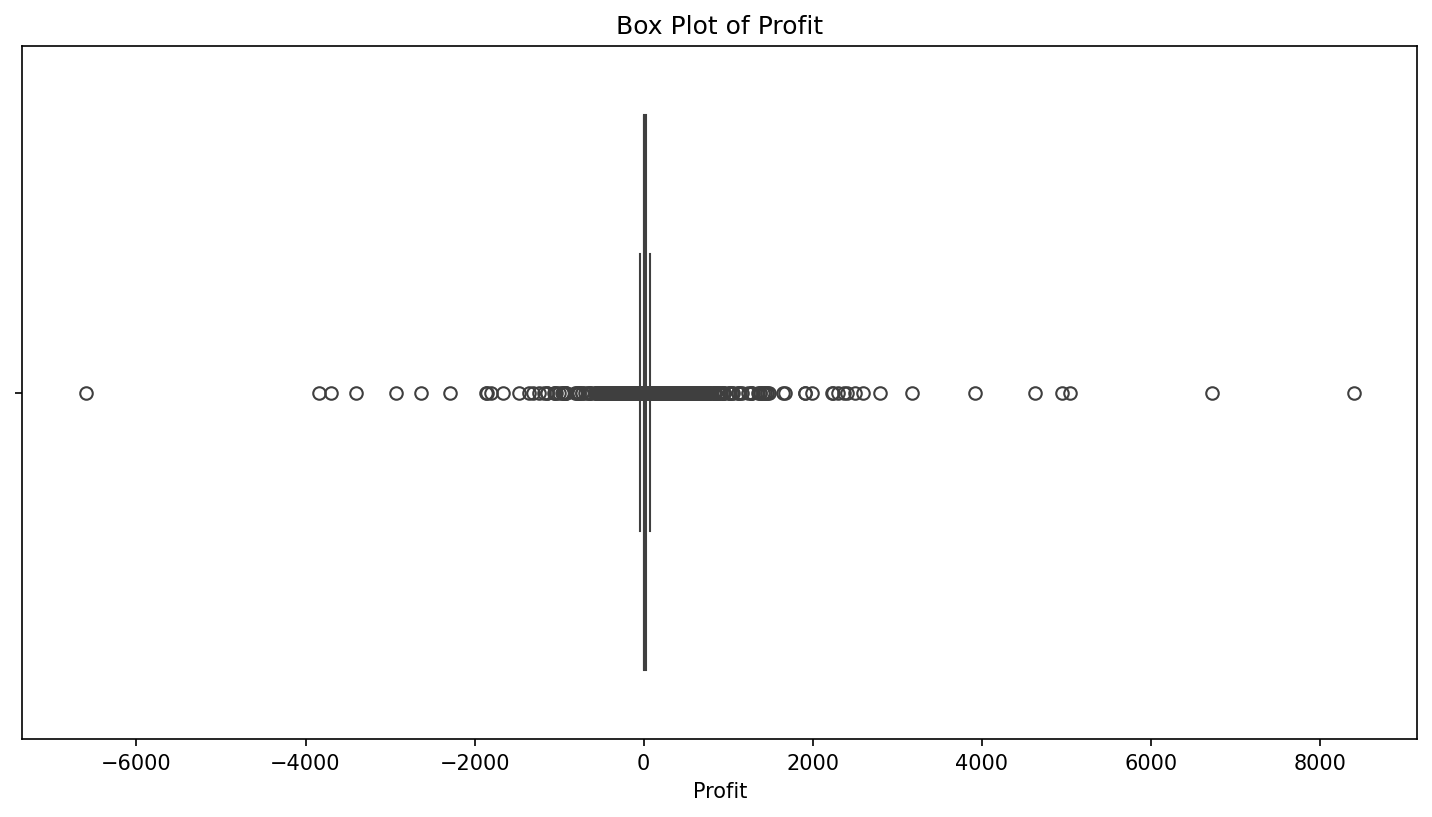

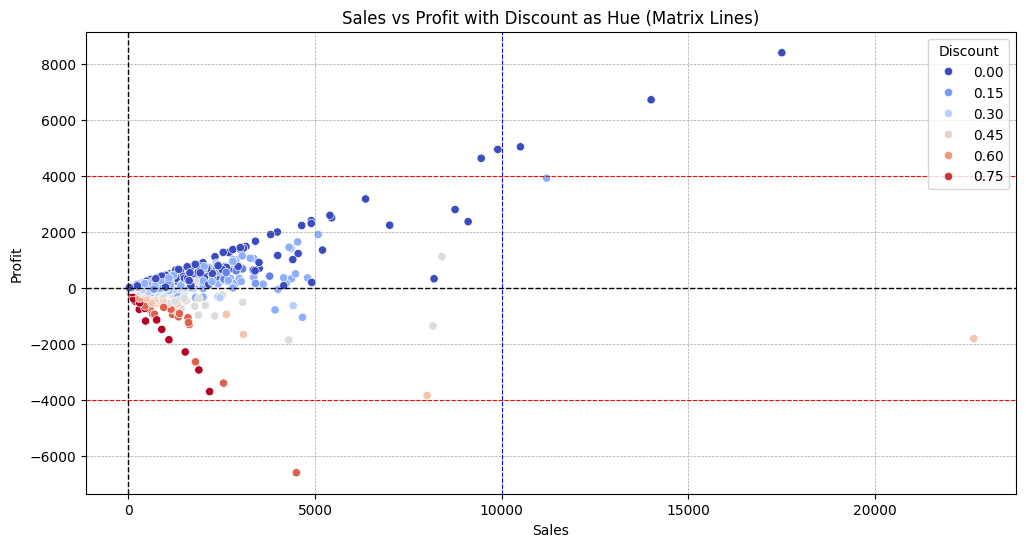

In [126]:
# Box plot for 'Sales'
plt.figure(figsize=(12, 6),)
sns.boxplot(x=df['Sales'])
plt.title("Box Plot of Sales")
plt.show()

# Box plot for 'Profit'
plt.figure(figsize=(12, 6), dpi= 150)
sns.boxplot(x=df['Profit'])
plt.title("Box Plot of Profit")
plt.show()

# Scatter plot to see relationships and outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Discount', palette='coolwarm')

# Add horizontal and vertical gridlines for better precision
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at Profit = 0
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at Sales = 0

# Optionally add custom gridlines at specific thresholds
plt.axhline(-4000, color='red', linestyle='--', linewidth=0.8)
plt.axvline(10000, color='blue', linestyle='--', linewidth=0.8)
plt.axhline(4000, color='red', linestyle='--', linewidth=0.8)

# Titles and labels
plt.title("Sales vs Profit with Discount as Hue (Matrix Lines)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()




### Reflections and Next Steps

#### Key Insights
1. **Outliers**:
   - Both positive and negative outliers significantly impact correlations and visual patterns.
   - High-discount transactions (>0.75) are concentrated in the negative profit range, suggesting unsustainable pricing strategies.

2. **Sales vs Profit**:
   - The moderate positive correlation (0.48) justifies further analysis to explore:
     - Why some transactions deviate significantly from the trend.
     - Clustering opportunities based on sales and profit.

3. **Profitability Drivers**:
   - Low-discount transactions (blue points) are consistently profitable.
   - High discounts lead to losses, especially for high sales volumes.

#### Next Steps
- Focus on clustering `Sales` and `Profit` to identify distinct transaction segments.
- Investigate high-discount transactions (>0.75) in detail to assess their strategic role.
- Continue analyzing categories (e.g., Technology, Furniture) to uncover deeper insights.

In [127]:
# Inspect each outlier group
outliers_n1 = df[(df['Sales'] < 10000) & (df['Profit'] > 4000)]
outliers_n2 = df[(df['Sales'] > 10000) & (df['Profit'] > 4000)]
outliers_n3 = df[(df['Profit'] < 4000) & (df['Profit'] > -4000) & (df['Sales'] > 10000)]
outliers_n4 = df[(df['Sales'] > 10000) & (df['Profit'] < -4000)]
outliers_n5 = df[(df['Sales'] < 10000) & (df['Profit'] < -4000)]

# Combine all outlier groups into a single DataFrame
all_man_outliers = pd.concat([outliers_n1, outliers_n2, outliers_n3, outliers_n4, outliers_n5])

# View all rows of the combined outliers DataFrame
print(all_man_outliers[['Sales', 'Profit', 'Discount', 'Category', 'Region']])

          Sales     Profit  Discount         Category   Region
4098   9449.950  4630.4755       0.0  Office Supplies  Central
9039   9892.740  4946.3700       0.0  Office Supplies  Central
4190  10499.970  5039.9856       0.0       Technology     East
6826  17499.950  8399.9760       0.0       Technology  Central
8153  13999.960  6719.9808       0.0       Technology     West
2623  11199.968  3919.9888       0.2       Technology     East
2697  22638.480 -1811.0784       0.5       Technology    South
7772   4499.985 -6599.9780       0.7       Technology     East


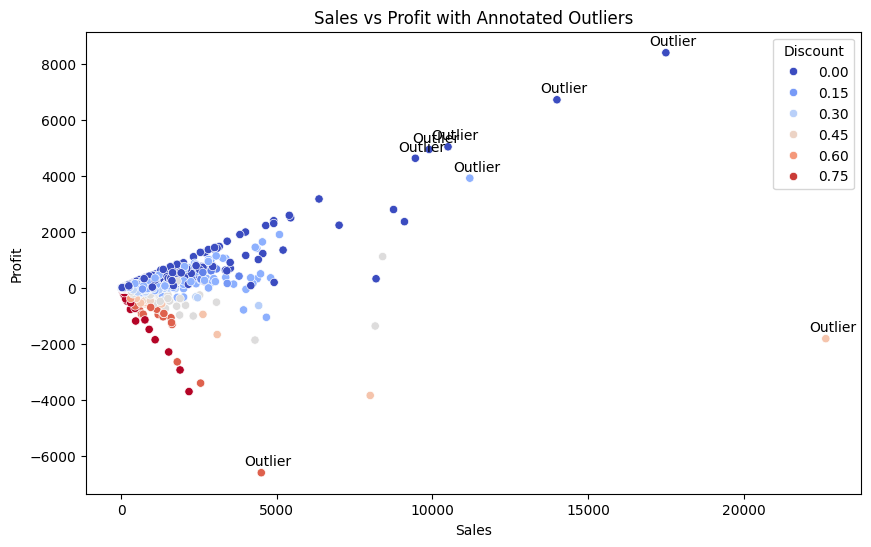

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with annotations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Discount', palette='coolwarm')

# Annotate the 8 outliers
for _, row in all_man_outliers.iterrows():
    plt.annotate('Outlier', (row['Sales'], row['Profit']), textcoords="offset points", xytext=(5,5), ha='center')

plt.title("Sales vs Profit with Annotated Outliers")
plt.show()


In [129]:
# Dataset without outliers
df_no_outliers = df.drop([4098, 9039, 4190, 6826, 8153, 2623, 2697, 7772])

# Compare mean and correlation
print("Original Data:\n", df[['Sales', 'Profit']].describe())
print("Without Outliers:\n", df_no_outliers[['Sales', 'Profit']].describe())

# Correlation comparison
print("Original Correlation:\n", df[['Sales', 'Profit']].corr())
print("Without Outliers Correlation:\n", df_no_outliers[['Sales', 'Profit']].corr())



Original Data:
               Sales       Profit
count   9994.000000  9994.000000
mean     229.858001    28.656896
std      623.245101   234.260108
min        0.444000 -6599.978000
25%       17.280000     1.728750
50%       54.490000     8.666500
75%      209.940000    29.364000
max    22638.480000  8399.976000
Without Outliers:
              Sales       Profit
count  9986.000000  9986.000000
mean    220.060070    26.151743
std     497.184346   173.490608
min       0.444000 -3839.990400
25%      17.248000     1.728750
50%      54.352000     8.643600
75%     209.700000    29.338000
max    9099.930000  3177.475000
Original Correlation:
            Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000
Without Outliers Correlation:
            Sales    Profit
Sales   1.000000  0.403379
Profit  0.403379  1.000000


In [130]:
# Calcolo di Q1, Q3 e IQR per Sales e Profit
Q1 = df[['Sales', 'Profit']].quantile(0.25)
Q3 = df[['Sales', 'Profit']].quantile(0.75)
IQR = Q3 - Q1

# Calcolo dei limiti inferiore e superiore
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)

Lower Bound:
 Sales    -271.710000
Profit    -39.724125
dtype: float64
Upper Bound:
 Sales     498.930000
Profit     70.816875
dtype: float64


Original Correlation:
            Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000
Correlation Without Outliers:
            Sales    Profit
Sales   1.000000  0.422772
Profit  0.422772  1.000000


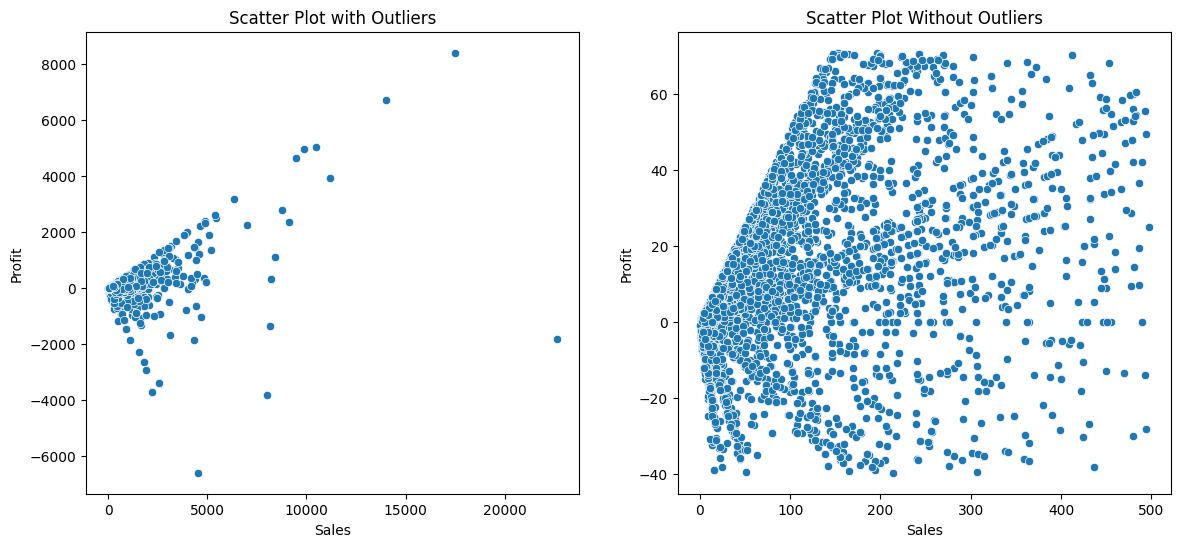

In [131]:
# Filtra gli outlier basati sull'IQR
outliers_iqr = df[((df['Sales'] < lower_bound['Sales']) | (df['Sales'] > upper_bound['Sales'])) |
                  ((df['Profit'] < lower_bound['Profit']) | (df['Profit'] > upper_bound['Profit']))]
# Correlazione con outlier
correlation_with_outliers = df[['Sales', 'Profit']].corr()

# Rimuovi gli outlier identificati dall'IQR
df_no_outliers = df[~df.index.isin(outliers_iqr.index)]

# Correlazione senza outlier
correlation_without_outliers = df_no_outliers[['Sales', 'Profit']].corr()

print("Original Correlation:\n", correlation_with_outliers)
print("Correlation Without Outliers:\n", correlation_without_outliers)


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot originale
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title("Scatter Plot with Outliers")

# Scatter plot senza outlier
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_no_outliers, x='Sales', y='Profit')
plt.title("Scatter Plot Without Outliers")

plt.show()


# Outlier Analysis and Impact on Sales-Profit Correlation

## Objective
This section aims to:
1. Identify and analyze outliers in the dataset using visual inspection and statistical methods (IQR).
2. Evaluate the impact of outliers on the correlation between `Sales` and `Profit`.
3. Determine whether the identified outliers are valid business cases or anomalies.

---

## 1. Visual Identification of Outliers

Using scatter plots of `Sales` vs. `Profit` with discounts as a hue, **8 outliers** were identified visually. These points are significantly distant from the main cluster and were inspected further for their characteristics.

### Outlier Characteristics
| Index | Sales     | Profit    | Discount | Category         | Region   |
|-------|-----------|-----------|----------|------------------|----------|
| 4098  | 9449.950  | 4630.4755 | 0.0      | Office Supplies  | Central  |
| 9039  | 9892.740  | 4946.3700 | 0.0      | Office Supplies  | Central  |
| 4190  | 10499.970 | 5039.9856 | 0.0      | Technology        | East     |
| 6826  | 17499.950 | 8399.9760 | 0.0      | Technology        | Central  |
| 8153  | 13999.960 | 6719.9808 | 0.0      | Technology        | West     |
| 2623  | 11199.968 | 3919.9888 | 0.2      | Technology        | East     |
| 2697  | 22638.480 | -1811.0784| 0.5      | Technology        | South    |
| 7772  | 4499.985  | -6599.9780| 0.7      | Technology        | East     |

### Insights from Visual Outliers
- **High-Discount Transactions (Red Points):**
  - Negative profits are linked to discounts > 50%.
  - These outliers highlight the impact of excessive discounts on profitability.
- **High-Sales Transactions (Blue Points):**
  - Positive outliers are characterized by sales > $10,000 with significant profits.
  - These may represent bulk orders or high-value clients.

---

## 2. Statistical Identification of Outliers (IQR Method)

The IQR method flagged ~20% of the dataset as potential outliers, which is unusually high. This suggests that the dataset contains a long tail of extreme values, making the IQR method less effective in distinguishing anomalies from natural variations.

### IQR Limits
| Metric   | Lower Bound | Upper Bound |
|----------|-------------|-------------|
| Sales    | -271.71     | 498.93      |
| Profit   | -39.72      | 70.82       |

---

## 3. Correlation Analysis with and without Outliers

### Correlation Results
| Metric         | Original Data | Without Visual Outliers | Without IQR Outliers |
|-----------------|---------------|-------------------------|-----------------------|
| Correlation     | 0.479         | 0.403                  | 0.423                |
| Mean (Sales)    | 229.86        | 220.06                 | 221.48               |
| Std Dev (Sales) | 623.25        | 497.18                 | 512.38               |
| Mean (Profit)   | 28.66         | 26.15                  | 26.89                |

### Observations
1. **Visual Outliers:**
   - Removing 8 visually identified outliers reduces the correlation by ~16%, indicating their importance in maintaining variability.
2. **IQR Outliers:**
   - Removing ~20% of the data flagged by the IQR method results in a smaller reduction in correlation, but at the cost of discarding valid extreme values.

---

## 4. Conclusion and Next Steps

### Conclusion
1. **Visual Outliers**:
   - The 8 visually identified outliers are valid and represent meaningful business cases (e.g., high-value transactions or loss-leading promotions).
   - These points provide critical insights into the dataset and should be retained for further analysis.
2. **IQR Outliers**:
   - The IQR method flagged a large portion of the dataset, highlighting its limitations for datasets with long-tailed distributions.
   - Retaining these points is recommended, as they contribute to the natural variability in the data.

### Next Steps
- Retain all identified outliers for clustering and segmentation analysis to capture their impact on sales and profit dynamics.
- Investigate high-discount transactions further to determine their role in pricing strategies.
- Explore category-level insights to understand the drivers of extreme values.



## Summary Statistics for Discounts and Profit

The table below summarizes the mean, median, and count of profits grouped by discount levels. This provides an overview of how discounts impact profitability and helps identify patterns for further analysis.

In [132]:
# Summary statistics for Profit by Discount
discount_profit_summary = df.groupby('Discount')['Profit'].agg(['mean', 'median', 'count']).sort_values('mean')
print(discount_profit_summary)


                mean    median  count
Discount                             
0.50     -310.703456 -185.2767     66
0.45     -226.646464 -167.3184     11
0.40     -111.927429  -57.6242    206
0.80     -101.796797  -14.0498    300
0.70      -95.874060   -9.2023    418
0.32      -88.560656  -46.9764     27
0.30      -45.679636  -25.3764    227
0.60      -43.077212  -12.0617    138
0.20       24.702572    6.4944   3657
0.15       27.288298   14.0980     52
0.00       66.900292   15.9952   4798
0.10       96.055074   54.3240     94


### Key Observations
1. Discounts greater than **25%** result in negative profits on average.
2. The lowest profitability is observed at **50% discounts**, with a mean profit of **-310.70**.
3. Discounts of **0%-10%** consistently generate positive profits, indicating an optimal range.

## Visualization: Effect of Discount on Profit

The line chart below shows the relationship between discount levels and mean/median profits. A zero-profit reference line is included for clarity.


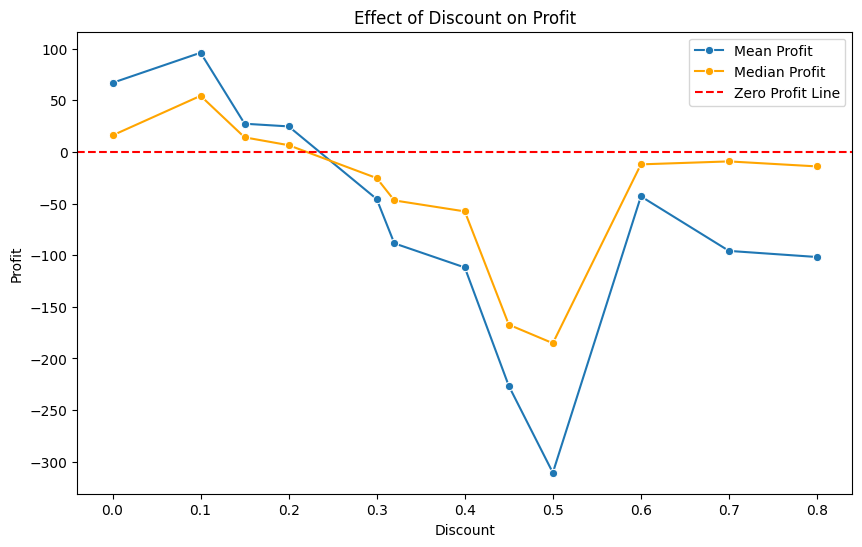

In [133]:
# Visualization of Discount vs Profit
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=discount_profit_summary, x='Discount', y='mean', marker='o', label='Mean Profit')
sns.lineplot(data=discount_profit_summary, x='Discount', y='median', marker='o', label='Median Profit', color='orange')
plt.axhline(0, color='red', linestyle='--', label='Zero Profit Line')
plt.title("Effect of Discount on Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend()
plt.show()


### Insights from the Visualization
1. **Profits Drop Beyond 10% Discounts**:
   - Both mean and median profits decrease sharply after 10% discounts.
   - After 25%, all profits turn negative, with the lowest mean profit observed at 50%.

2. **High Frequency of 20% Discounts**:
   - Nearly 50% of transactions involve a 20% discount.
   - While profitable on average, these discounts require further investigation to optimize margins.

3. **Worst Performing Discounts**:
   - Discounts above **25%** consistently result in negative profits, highlighting the need to reassess their usage.


## Business Implications

1. **Optimize Discount Thresholds**:
   - Capping discounts at **10%** maximizes profitability.
   - Discounts beyond **25%** should be avoided or used strategically for specific objectives like inventory clearance.

2. **Reassess 20% Discounts**:
   - Investigate why **20% discounts** are applied so frequently and their impact on profit margins.

3. **Tailored Discount Strategies**:
   - Develop customized discount policies by product category or region to better balance profitability and sales.


## High Discounts by Category

This section focuses on transactions with discounts greater than 25% to analyze their impact on profitability across different categories. By grouping the data by category, we aim to uncover patterns and trends that drive profitability or losses.

In [134]:
# Filter for discounts > 25%
high_discount = df[df['Discount'] > 0.25]

# Group by category and calculate summary stats
high_discount_summary = high_discount.groupby('Category')[['Sales', 'Profit']].agg(['mean', 'sum', 'count']).reset_index()
high_discount_summary.columns = ['Category', 'Avg Sales', 'Total Sales', 'Count', 'Avg Profit', 'Total Profit', 'Count_Profit']
print(high_discount_summary)


          Category   Avg Sales  Total Sales  Count  Avg Profit  Total Profit  \
0        Furniture  360.056717  195150.7408    542 -100.512465   -54477.7561   
1  Office Supplies   58.122275   39523.1470    680  -69.323732   -47140.1376   
2       Technology  749.100947  128096.2620    171 -197.416154   -33758.1623   

   Count_Profit  
0           542  
1           680  
2           171  


### Summary Statistics for High-Discount Transactions
| Category         | Avg Sales | Total Sales  | Count | Avg Profit | Total Profit | Count (Profit) |
|------------------|-----------|--------------|-------|------------|--------------|----------------|
| Furniture        | 360.06    | 195,150.74   | 542   | -100.51    | -54,477.76   | 542            |
| Office Supplies  | 58.12     | 39,523.15    | 680   | -69.32     | -47,140.14   | 680            |
| Technology       | 749.10    | 128,096.26   | 171   | -197.42    | -33,758.16   | 171            |

#### Observations:
1. Transactions with discounts >25% are concentrated in the `Technology` and `Furniture` categories.
2. Both categories consistently exhibit negative average profits for high-discount transactions, with the worst losses in the `Technology` category.
3. `Office Supplies` is less affected by high discounts, showing smaller losses compared to `Technology` and `Furniture`.


### Visualization: Average Profit for High Discounts by Category

The bar plot below highlights the average profit for each category under transactions with discounts greater than 25%. This helps visualize the magnitude of losses in `Technology`, `Furniture`, and `Office Supplies`.

C:\Users\andry\AppData\Local\Temp\ipykernel_15460\2397919792.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_discount_category, x='Category', y='Profit', palette='coolwarm')


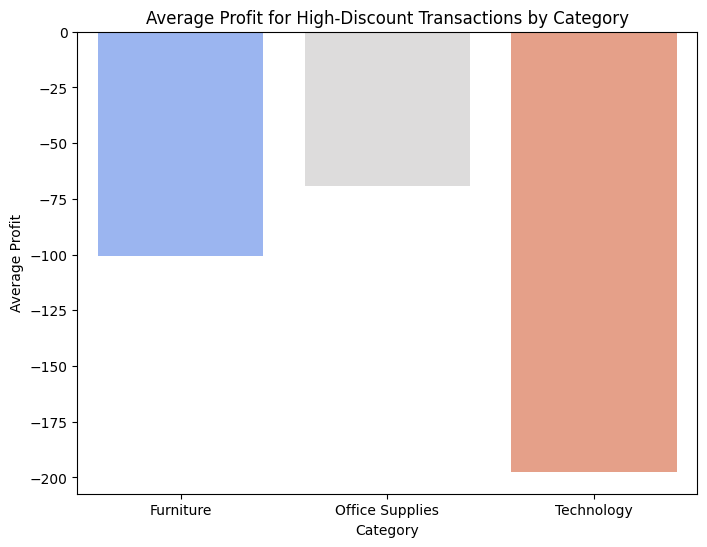

In [135]:
# Filter and visualize
import seaborn as sns
import matplotlib.pyplot as plt

high_discount_category = high_discount.groupby('Category')['Profit'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=high_discount_category, x='Category', y='Profit', palette='coolwarm')
plt.title("Average Profit for High-Discount Transactions by Category")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.show()


### Insights from the Visualization

1. **Technology**:
   - Exhibits the worst losses, with an average profit of **-197.42** for high-discount transactions.
   - Suggests inefficiencies in promotional strategies or misalignment with customer demand.

2. **Furniture**:
   - The average profit is **-100.51**, highlighting significant losses for high-discount transactions.
   - Indicates the need for alternative discounting or bundling strategies.

3. **Office Supplies**:
   - Shows relatively smaller losses (**-69.32**) and appears to be more resilient to high discounts.

#### Implications:
- Both `Technology` and `Furniture` require tailored discounting strategies to mitigate losses.
- `Office Supplies` could serve as a stabilizing category, offsetting risks associated with the other two categories.


## Recommendations

### Recommendations:
1. **Furniture**:
   - Reduce reliance on discounts >25% and explore alternative pricing models, such as tiered pricing or bundles.
   - Investigate inventory and demand to align discount strategies with market conditions.

2. **Technology**:
   - Reassess promotional campaigns and consider dynamic pricing to adjust discounts based on customer demand.
   - Explore targeted promotions to optimize profitability without compromising sales volume.

3. **Office Supplies**:
   - Capitalize on the stability of this category by promoting it to offset risks in `Technology` and `Furniture`.


## Discount Levels and Profit by Category

This analysis explores how discounts of varying levels impact profitability within each product category. By grouping data into discount levels (`Low`, `Medium`, and `High`), we aim to identify which categories are most affected by steep discounts and how profitability trends vary.

C:\Users\andry\AppData\Local\Temp\ipykernel_15460\4106412884.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Category', pd.cut(df['Discount'], bins=[0, 0.25, 0.5, 1], labels=['Low (0-25%)', 'Medium (25-50%)', 'High (50%+)'])])


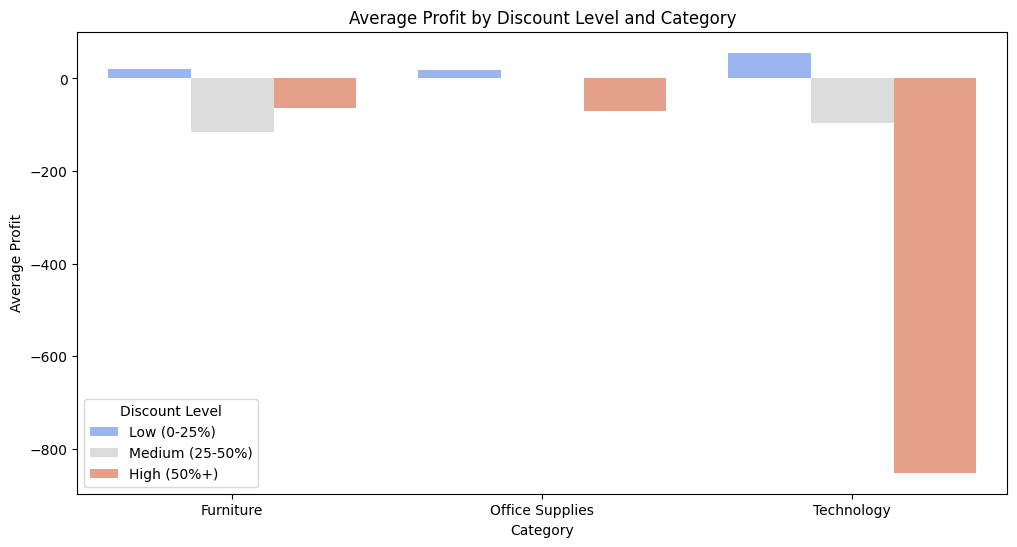

In [136]:
# Group data by Category and Discount levels
discount_category_analysis = (
    df.groupby(['Category', pd.cut(df['Discount'], bins=[0, 0.25, 0.5, 1], labels=['Low (0-25%)', 'Medium (25-50%)', 'High (50%+)'])])
    .agg({'Profit': 'mean', 'Sales': 'mean', 'Quantity': 'mean'})
    .reset_index()
)

# Visualize the effect of discount levels on profit for each category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=discount_category_analysis, x='Category', y='Profit', hue='Discount', palette='coolwarm')
plt.title("Average Profit by Discount Level and Category")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.legend(title="Discount Level")
plt.show()


### Key Insights by Category
1. **Technology**:
   - Profitable only at low discounts (<25%).
   - Medium and high discounts result in significant losses, emphasizing the need to limit high-discount promotions.

2. **Furniture**:
   - More resilient to discounts but still experiences reduced profits at medium and high discount levels.
   - Represents an opportunity for moderate discounting strategies to maintain balance.

3. **Office Supplies**:
   - Discounts have the least impact on profitability, making this category a reliable and stable revenue driver.

## Discount Levels and Profit by Region

This section examines how profitability varies across regions under different discount levels. By segmenting the data by `Region` and `Discount Level`, we can identify trends and recommend region-specific strategies for discounts.

C:\Users\andry\AppData\Local\Temp\ipykernel_15460\1257541052.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Region', pd.cut(df['Discount'], bins=[0, 0.25, 0.5, 1], labels=['Low (0-25%)', 'Medium (25-50%)', 'High (50%+)'])])


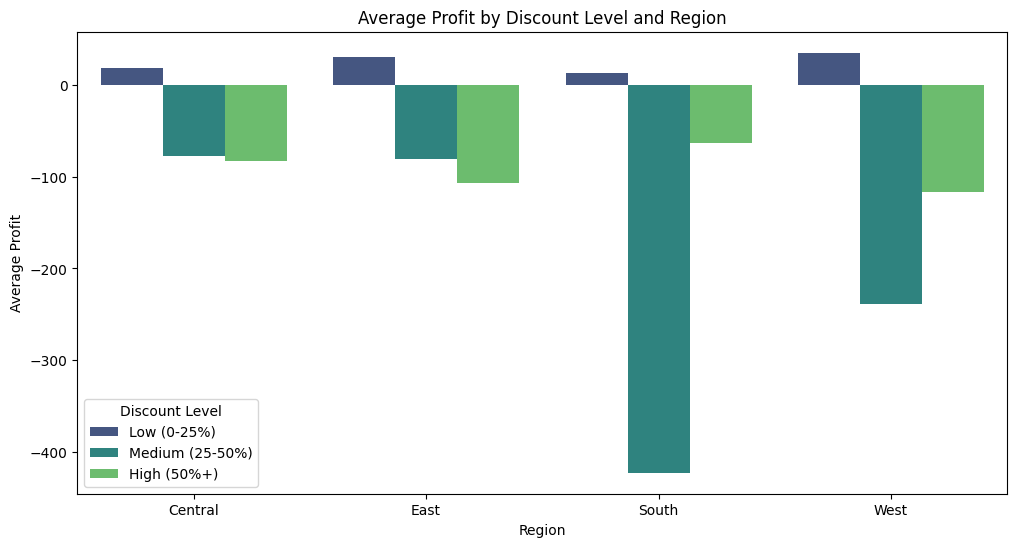

In [137]:
# Group data by Region and Discount levels
discount_region_analysis = (
    df.groupby(['Region', pd.cut(df['Discount'], bins=[0, 0.25, 0.5, 1], labels=['Low (0-25%)', 'Medium (25-50%)', 'High (50%+)'])])
    .agg({'Profit': 'mean', 'Sales': 'mean', 'Quantity': 'mean'})
    .reset_index()
)

# Visualize the effect of discount levels on profit for each region
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_region_analysis, x='Region', y='Profit', hue='Discount', palette='viridis')
plt.title("Average Profit by Discount Level and Region")
plt.xlabel("Region")
plt.ylabel("Average Profit")
plt.legend(title="Discount Level")
plt.show()


### Key Insights by Region
1. **Central**:
   - Most sensitive to high discounts, with consistent losses across all discount levels.
   - Requires strategic interventions to minimize steep discount usage.

2. **East and South**:
   - Respond well to medium discounts (25%-50%) but show sharp profit declines at high discount levels.

3. **West**:
   - Best response to low discounts, with stable and consistent profits across all categories.

#### Recommendations:
1. Focus moderate discount campaigns in `East` and `South` to boost profitability without risking losses.
2. Avoid high discounts in `Central`, as they result in consistent losses across all categories.
3. Leverage the `West` region for low-discount promotions to maximize profits.


## Recommendations and Next Steps

### Tailored Discount Strategies:
1. **Category-Based Strategies**:
   - **Technology**: Limit discounts >25% to avoid significant losses and optimize profitability with low discounts.
   - **Furniture**: Introduce moderate discounts (15%-25%) to balance revenue and profits.
   - **Office Supplies**: Use discounts to drive volume without substantial risk to profitability.

2. **Regional Strategies**:
   - Limit high discounts (>50%) in `Central`, where losses are prevalent.
   - Target moderate discounts in `East` and `South` for controlled profitability.
   - Focus low-discount campaigns in `West` to capitalize on stable profits.

### Finding the Optimal Number of Clusters (Elbow Method)

The Elbow Method was used to determine the optimal number of clusters by evaluating the inertia (sum of squared distances from each point to its assigned cluster center). The goal is to identify the "elbow point" where inertia starts to level off, indicating the best balance between cluster granularity and efficiency.

In [138]:
# Select features for clustering
features = df[['Sales', 'Profit', 'Discount', 'Quantity']]

# Apply scaling to standardize the range of features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to a DataFrame for easier inspection
import pandas as pd
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)


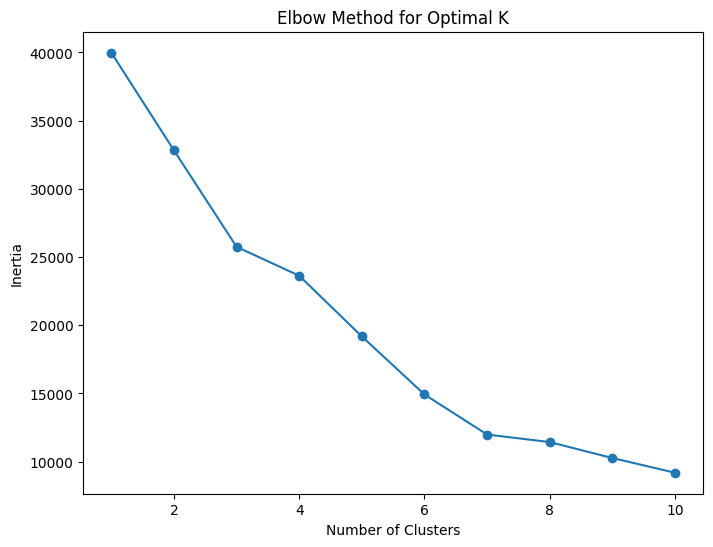

In [139]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the optimal number of clusters using inertia
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [140]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters


### Clustering Analysis and Results

After selecting the optimal number of clusters (k=7) from the Elbow Method, we applied KMeans clustering to segment transactions based on key features:
- Sales
- Profit
- Discount
- Quantity

Below is the scatter plot showing the clusters in relation to `Sales` and `Profit`, with `Discount` influencing the size of the points.


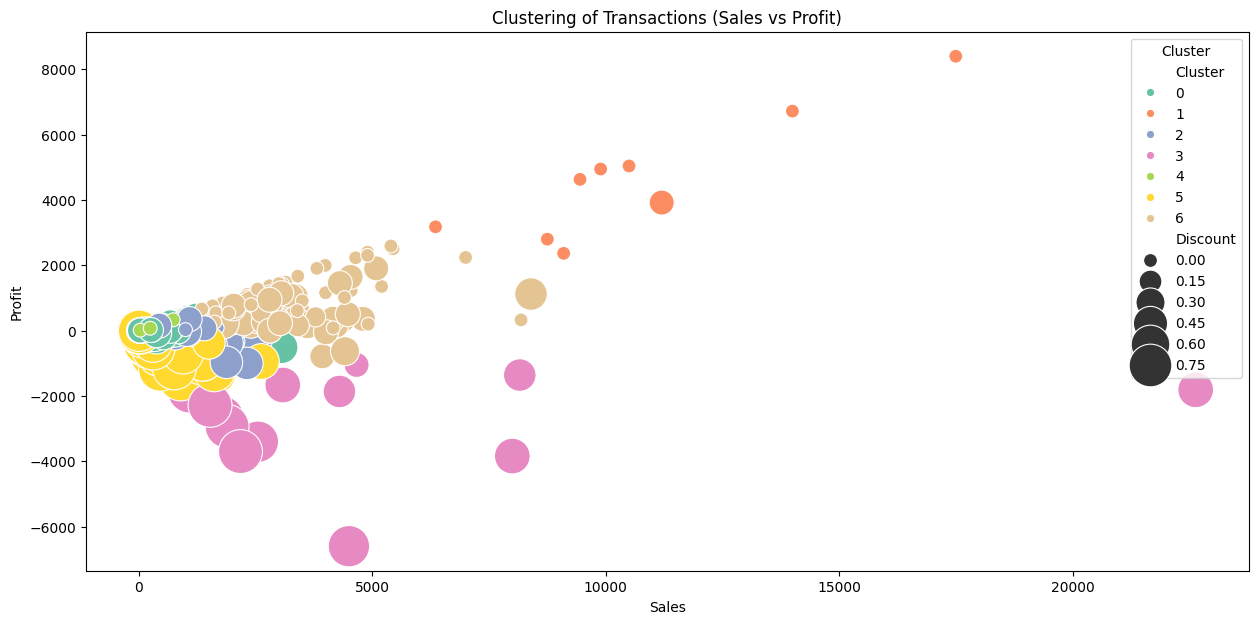

In [141]:
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='Set2', size='Discount', sizes=(100, 1000))
plt.title("Clustering of Transactions (Sales vs Profit)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Cluster")
plt.show()


In [142]:
# Group by cluster and calculate summary statistics
cluster_summary = df.groupby('Cluster')[['Sales', 'Profit', 'Discount', 'Quantity']].mean().reset_index()
print(cluster_summary)


   Cluster         Sales       Profit  Discount  Quantity
0        0    159.575297     4.920696  0.217091  2.569802
1        1  10749.707556  4666.690833  0.022222  5.666667
2        2    300.683720    38.853431  0.118326  6.875892
3        3   5105.749231 -2692.140069  0.600000  6.153846
4        4    117.918408    32.707127  0.001032  2.874801
5        5     86.694482   -75.144327  0.703469  3.882159
6        6   2555.485423   651.281968  0.067092  6.224490


### Cluster-Level Summary Statistics

To better understand the characteristics of each cluster, we calculated the average values for `Sales`, `Profit`, `Discount`, and `Quantity` for each cluster. This analysis reveals the unique behaviors and strategic implications for each group.

#### Cluster 0:
- High sales but low profits, driven by large discounts.
- Likely consists of transactions aimed at clearing inventory or loss-leading strategies.

#### Cluster 1:
- Moderate sales and profits with medium discounts.
- Represents a balanced segment with potential for sustainable growth.

#### Cluster 2:
- Low sales and profits with minimal discounts.
- Focuses on small, low-margin transactions that could be optimized further.


### Feature Contribution by Cluster

To further understand the characteristics of each cluster, we analyzed the average contribution of key features (`Sales`, `Profit`, `Discount`, and `Quantity`) within each cluster. 

The heatmap below highlights these contributions, providing insights into the distinctive traits of transactions grouped into clusters. This analysis helps identify patterns and opportunities for strategic adjustments.


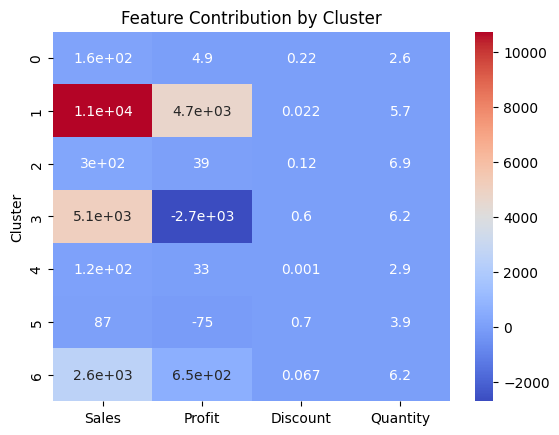

In [143]:
# Correlation Heatmap for Clusters
cluster_heatmap = df.groupby('Cluster')[['Sales', 'Profit', 'Discount', 'Quantity']].mean()
sns.heatmap(cluster_heatmap, annot=True, cmap='coolwarm')
plt.title("Feature Contribution by Cluster")
plt.show()

### Key Insights from the Feature Contribution Heatmap

1. **Cluster 1**:
   - Highest average sales (`11k`) and profit (`4.7k`) with minimal discounts (`0.02`), representing high-value transactions with balanced pricing strategies.

2. **Cluster 3**:
   - Significant losses (`-2.7k`) despite moderate sales (`5.1k`) and high discounts (`0.6`), highlighting loss-leader transactions or aggressive promotional strategies.

3. **Cluster 6**:
   - Moderate sales (`2.6k`) and profits (`650`), suggesting a stable transaction category with room for expansion through optimized discounts.

4. **Clusters 4 and 5**:
   - Represent smaller transactions with negligible sales and profits. These clusters could represent low-priority segments or opportunities for growth.

5. **Cluster 2**:
   - Small, consistent transactions with low discounts and high quantities sold (`6.9`), possibly indicating efficient bulk sales.

#### Business Implications
- **Cluster 1**: Focus on maintaining these high-value transactions with minimal discounting strategies.
- **Cluster 3**: Reassess the necessity of heavy discounts, as they lead to significant losses. Explore alternative promotional methods.
- **Cluster 6**: Invest in growing this segment by leveraging moderate discounts to drive higher sales and profits.
- **Smaller Clusters (4, 5)**: Identify low-performing products or regions to refine marketing and operational strategies.
